In [308]:
%matplotlib inline
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

In [580]:
def iterate_mandelbrot(c, iterate_max, z=0):
    for n in range(iterate_max+1):
        z = z*z + c
        if abs(z) > 2:
            return n
    return None

In [600]:
def calculate_mandelbrot_image(xmin,xmax,Nx,ymin,ymax,iterate_max,center,scale):
    delta = (xmax-xmin)/Nx;
    Ny = round((ymax-ymin)/delta);
    x = np.linspace(xmin,xmax,Nx);
    y = np.linspace(ymin,ymax,Ny);
    fractal = np.array(np.zeros((Nx,Ny), dtype=np.complex))
    for i in range(0,Nx):
        for j in range(0,Ny):
            c = complex(x[i]*scale-center[0], y[j]*scale-center[1])
            n = iterate_mandelbrot(c,iterate_max)
            if n is None:
                fractal[i,j] = 1.0
            else:
                fractal[i,j] = n/iterate_max
    return x,y,fractal

In [ ]:
iterate_max = 1000; center = (2.2, 1.5); scale = 3.0/800.0; Nx = 1000;
#xmin=0; xmax=800; ymin=0; ymax=800;          # zoom0
#xmin=320; xmax=420; ymin=400; ymax=500;       # zoom1
#xmin=382; xmax=389; ymin=418; ymax=425;      # zoom2
#xmin=386.5; xmax=388.5; ymin=423; ymax=425;  # zoom3
xmin=386.5; xmax=388.5; ymin=421; ymax=425;  # zoom3 - long

In [597]:
x,y,fractal = calculate_mandelbrot_image(xmin,xmax,Nx,ymin,ymax,iterate_max,center,scale)
C = np.power(np.real(fractal),0.5)

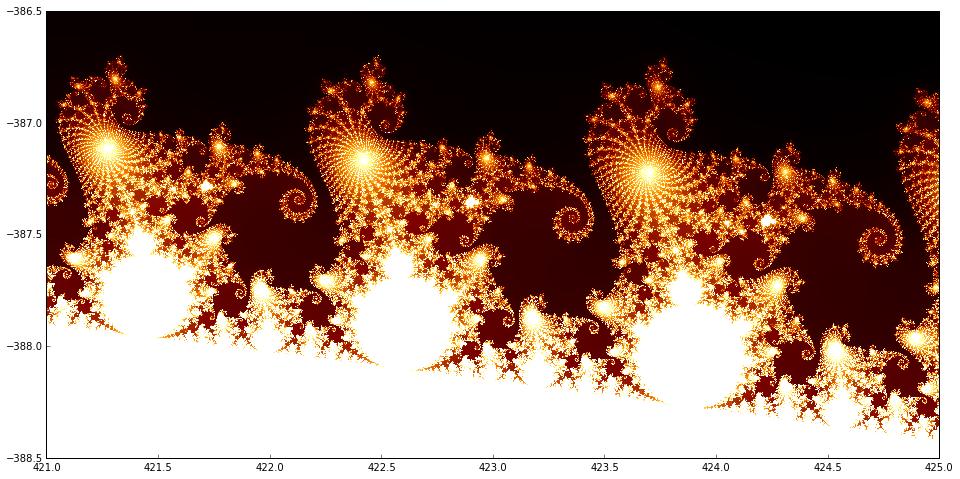

In [602]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.pcolor(y,-x,np.abs(C),cmap=plt.cm.RdGy)
plt.pcolor(y,-x,np.abs(C),cmap=plt.cm.afmhot)
ax.set_aspect('equal')

In [607]:
fig.savefig('fractal.png', dpi=1000)